# import

In [21]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sidetable as stb

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split # TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, PowerTransformer
# .fit(), .transformer(), fit_transformer()
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder 
from sklearn import metrics # .mean_squared_error(), .r2_score()
from sklearn.linear_model import Ridge
from sklearn.metrics import silhouette_score

from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

cm = 1/2.54

# Clustering tutorial

In [22]:
# create blobs
data = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=3, random_state=100)

db = pd.DataFrame(data = data[0], columns = ['zero', 'um'])
db['class'] = data[1]

display(
    db.head(),
db.describe()
)

,zero,um,class
0,2.306457,7.265743,1
1,-1.747747,5.940667,1
2,-4.167424,5.408068,1
3,-10.968584,-2.700714,2
4,-8.406688,-8.012437,2


,zero,um,class
count,1000.000000,1000.000000,1000.000000
mean,-3.443289,-1.801232,0.999000
std,5.576315,6.937096,0.817109
min,-18.361582,-15.532242,0.000000
25%,-8.117744,-7.236849,0.000000
50%,-2.425562,-3.906012,1.000000
75%,0.638405,4.765550,2.000000
max,12.441918,15.552778,2.000000


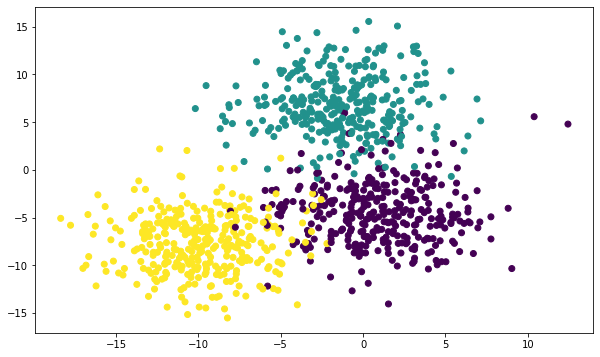

In [23]:

# create scatter plot
fig = plt.figure(figsize=(10,6))
# fig.add_subplot(projection='3d')

plt.scatter(db['zero'], db['um'], c=db['class'])


In [24]:
# create kmeans object
kmeans = KMeans(n_clusters=3)
# print(kmeans)

# fit kmeans object to data
kmeans.fit(db)

# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(db)

# print(y_km)

db['km'] = y_km

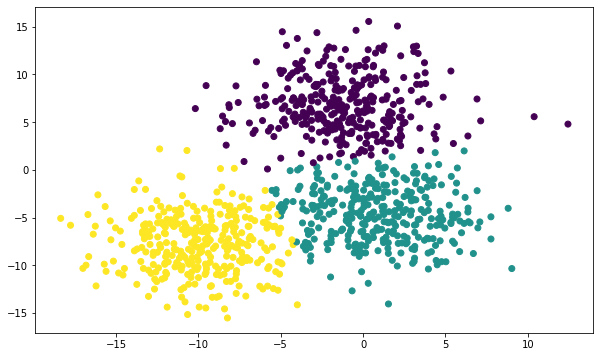

In [25]:
fig = plt.figure(figsize=(10,6))
# fig.add_subplot(projection='3d')

plt.scatter(db['zero'], db['um'], c=db['km'])

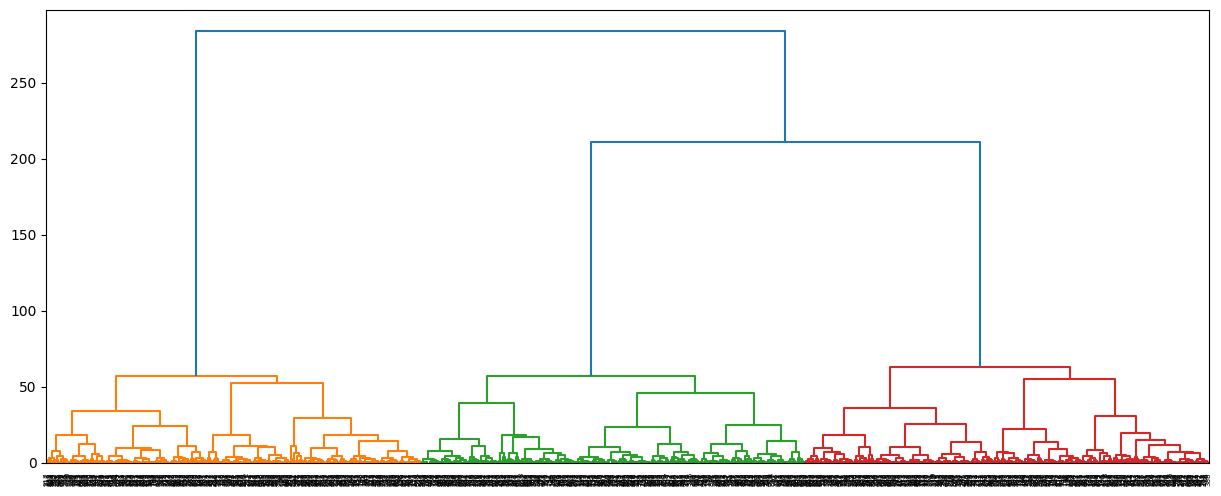

In [26]:
# create dendrogram
plt.figure(figsize = (15,6), dpi = 100)
dendrogram = sch.dendrogram(sch.linkage(db, method='ward'))
plt.xticks(None, rotation = 90)
plt.show()


In [27]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(db)

db['hc'] = y_hc

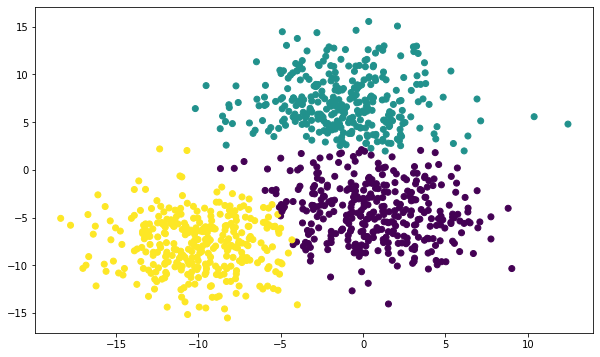

In [28]:
fig = plt.figure(figsize=(10,6))

plt.scatter(db['zero'], db['um'], c=db['hc'])

# ZM

# Importacao

In [29]:
db = pd.read_csv('C:\Repositories\MineralogicData_Clustering\data\centroid_PINiCo2.csv')

In [30]:
db.columns

Index(['Unnamed: 0', 'index', 'Particle ID', 'sample', 'Grain ID',
       'Mineral Classification', 'Spectrum Counts', 'Porosity', 'Roughness',
       'Area µm²', 'Ti', 'O', 'C', 'Fe', 'Al', 'Si', 'Ni', 'Mn', 'Co', 'Mg',
       'S', 'V', 'Sc', 'Cu', 'Cr', 'Ca', 'Ba', 'Na', 'K', 'Zn'],
      dtype='object')

In [31]:
db_chem = db.loc[:, ['Mineral Classification', 'Spectrum Counts', 'Ti', 'Fe', 'Al', 'Si', 'Ni', 'Mn', 'Co', 'Mg', 'Cr', 'Ca', 'Ba', 'Na', 'K', 'Zn']]

# Pipeline

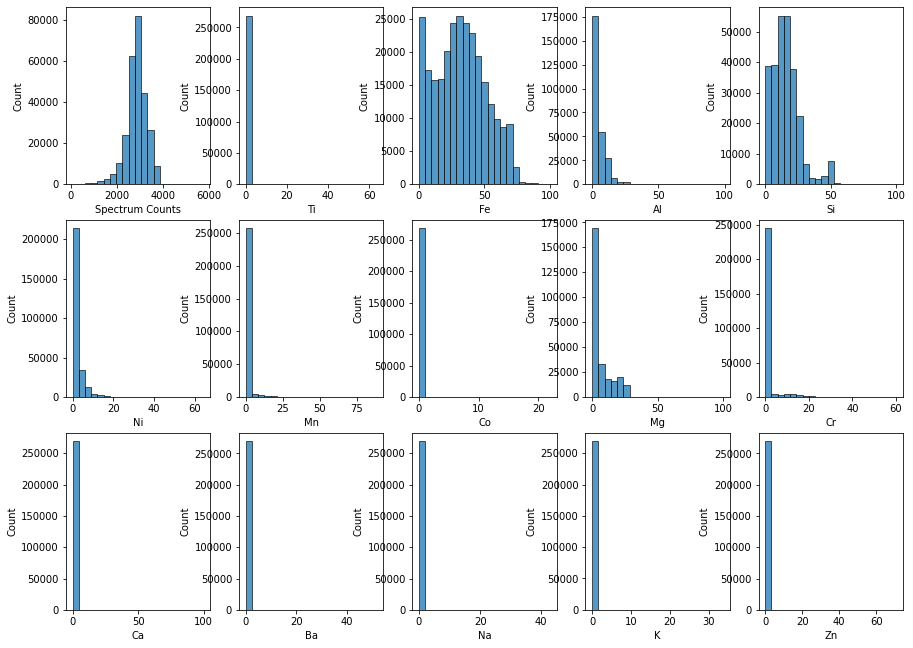

In [32]:
# ANALISANDO DISTRIBUICAO DOS ELEMENTOS

plt.figure(figsize=(15,15))
x = 1
for i in db_chem.loc[:,'Spectrum Counts':].columns:
    plt.subplot(4,5, x)
    x += 1
    sns.histplot(data = db_chem, x = i, bins = 21);

DEPRECATED LOG TRANSFORMATION

db_yeo = np.log(db_train)
db_yeo = (
            pd.DataFrame(
                columns = db_train.columns, 
                data = StandardScaler().fit_transform(db_yeo)
            ))

PowerTransformer(method = 'box-cox', standardize = True,).fit_transform(db_train)

In [33]:
PT = PowerTransformer(method='yeo-johnson', standardize = True).fit_transform(db_chem.loc[:,'Spectrum Counts':])

X = db_chem.loc[:,'Mineral Classification']

X = pd.concat(
    [X, pd.DataFrame(data = PT, columns=db_chem.loc[:,'Spectrum Counts':].columns)],
    axis = 1)


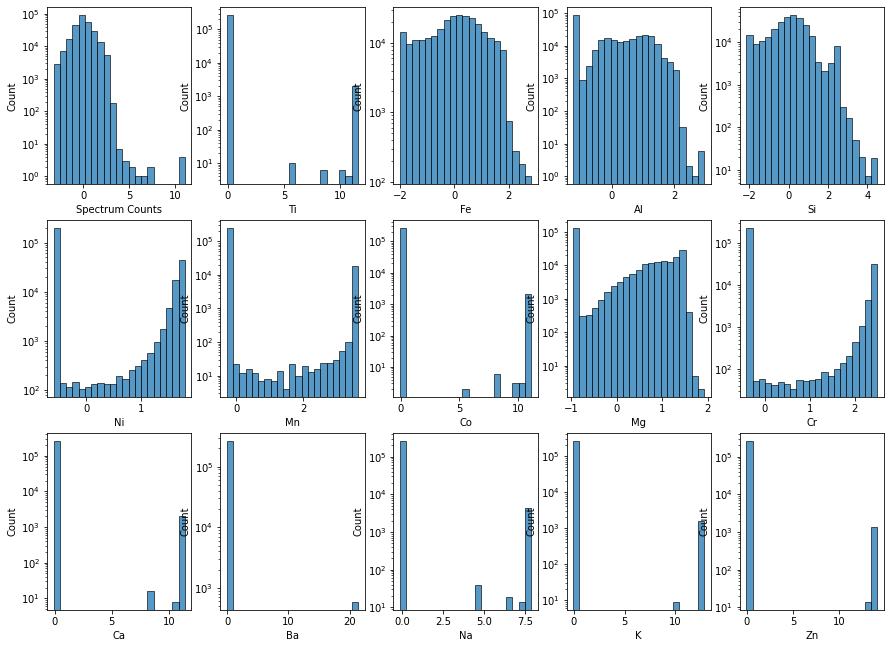

In [34]:
plt.figure(figsize=(15,15))
x = 1
for i in X.loc[:, 'Spectrum Counts':].columns:
    plt.subplot(4,5, x)
    x += 1
    sns.histplot(data = X, x = i, bins = 21)
    plt.yscale('log');

# 
---

# PCA

In [35]:
n_components = 11

pca_model = PCA(n_components)
pca = pd.DataFrame(data = pca_model.fit_transform(X.loc[:, 'Spectrum Counts':]),
                columns = np.arange(1, (n_components+1), 1))

pca_model.explained_variance_ratio_

array([0.1270299 , 0.10039935, 0.09743577, 0.07663037, 0.07162051,
       0.06743725, 0.06670735, 0.06652287, 0.06585714, 0.06455071,
       0.06120798])

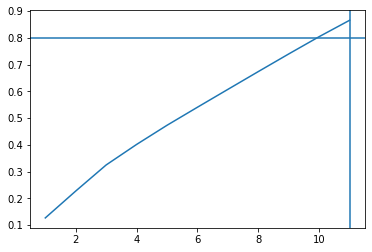

In [36]:
sns.lineplot(y = np.cumsum(pca_model.explained_variance_ratio_),
x = np.arange(1,n_components+1, 1))
plt.axvline(11)
plt.axhline(0.8);

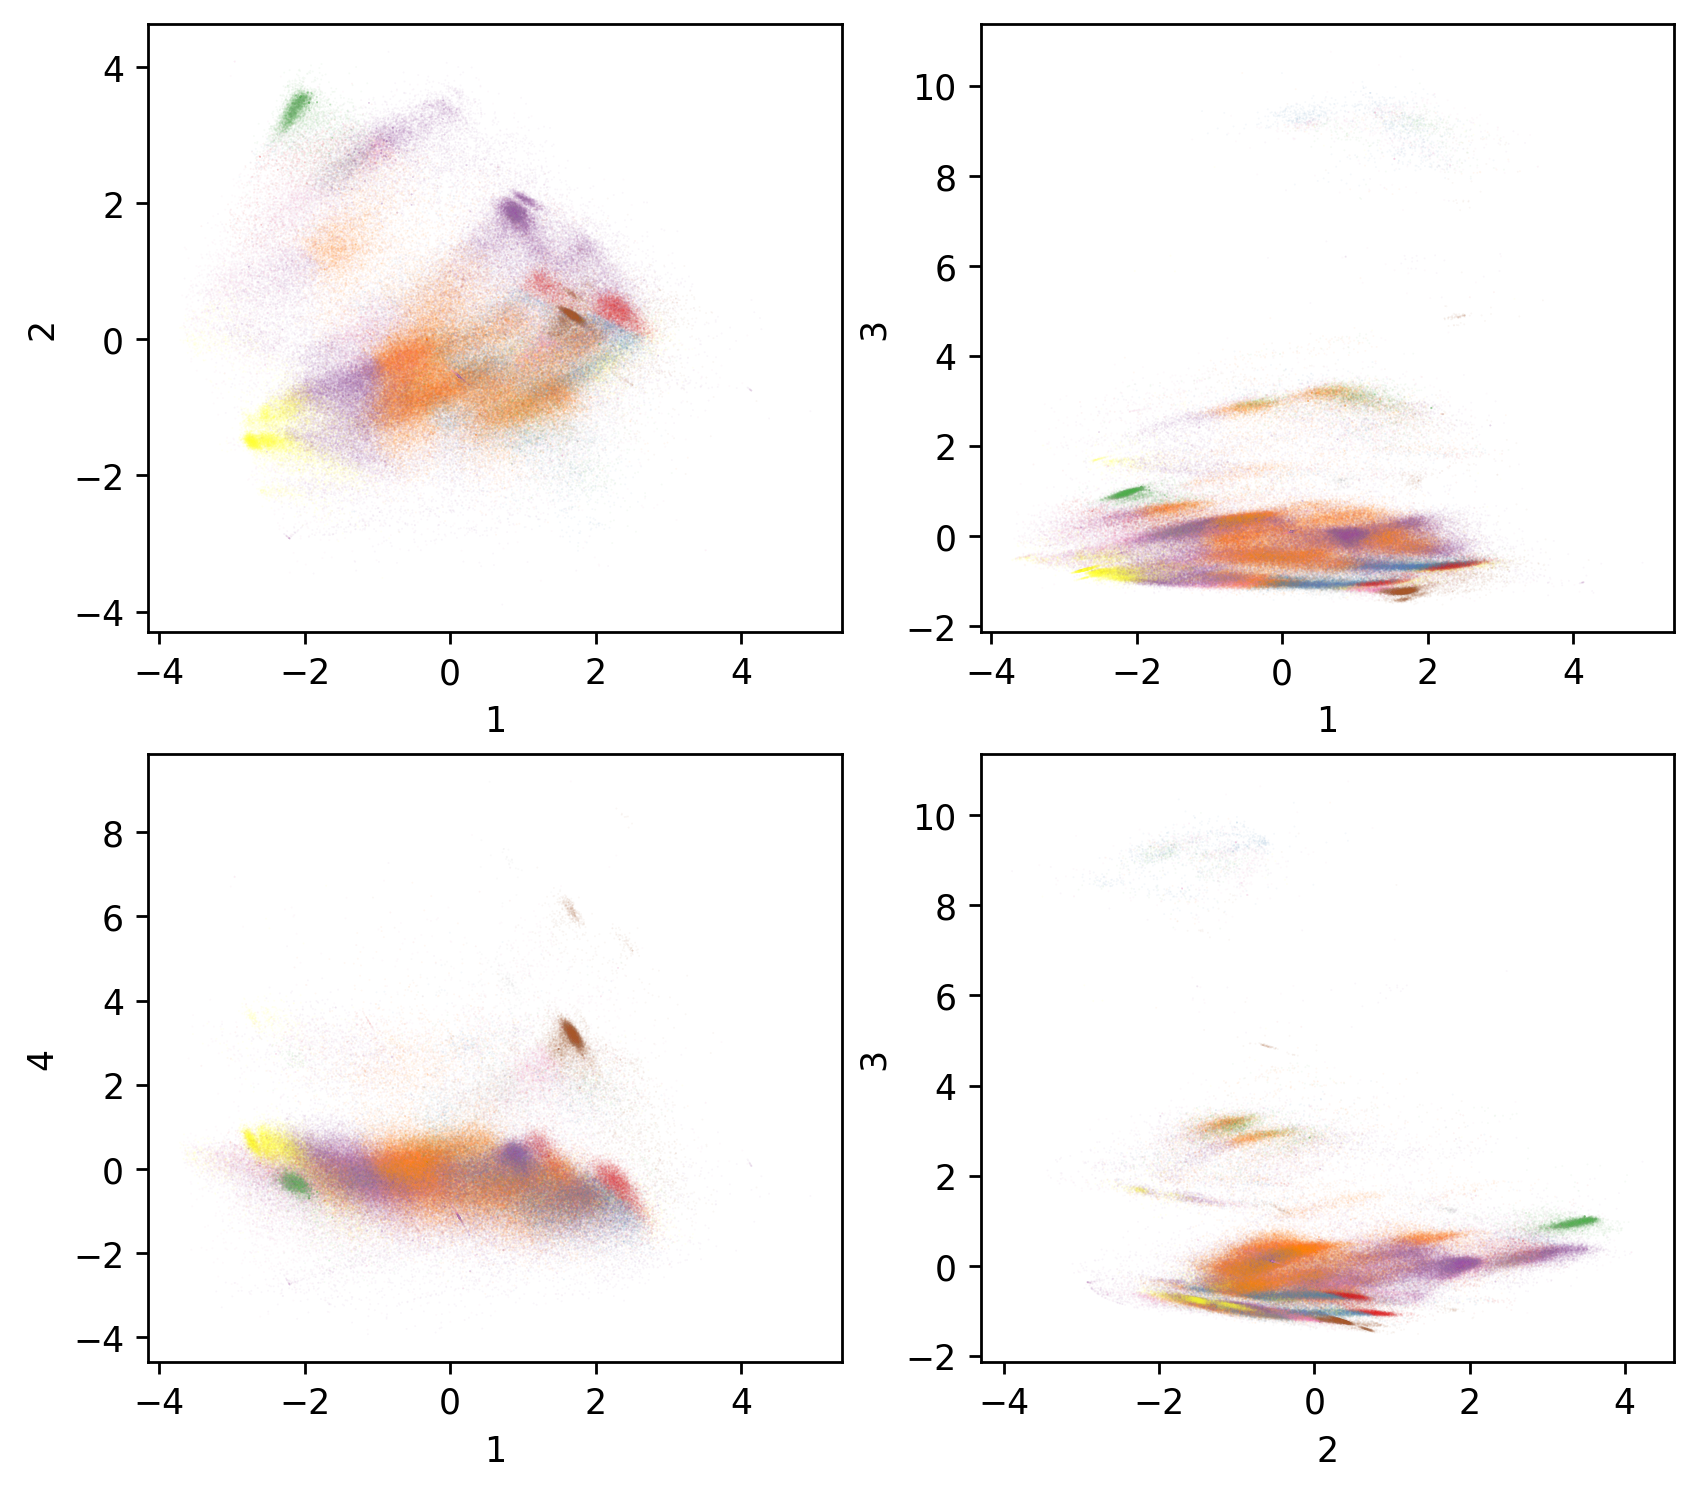

In [37]:
# PC vs PC

plt.figure(figsize = (20*cm, 18*cm), dpi = 250)

# Config
alpha = 0.05
size = 0.3
minerals = X['Mineral Classification']
palet = 'Set1'
legenda = False

plt.subplot(2,2,1)

sns.scatterplot(
    data = pca,
    x = 1,
    y = 2,
    s = size,
    alpha = alpha,
    # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda
)

plt.subplot(2,2,2)

sns.scatterplot(
    data = pca,
    x = 1,
    y = 3,
    s = size,
    alpha = alpha,
      # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda 
)

plt.subplot(2,2,3)

sns.scatterplot(
    data = pca,
    x = 1,
    y = 4,
    s = size,
    alpha = alpha,
        # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda  
)

plt.subplot(2,2,4)

sns.scatterplot(
    data = pca,
    x = 2,
    y = 3,
    s = size,
    alpha = alpha,
        # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda  
)

plt.show()

In [38]:
# XTrain, XTest, yTrain, yTest = train_test_split(pca, 
#                                                 db_chem['Mineral Classification'], 
#                                                 train_size=0.025, 
#                                                 stratify = db_chem['Mineral Classification'])

# yTrain, yTest = pd.DataFrame(yTrain), pd.DataFrame(yTest)

# Split Data

In [39]:
y = X[['Mineral Classification']]

XTrain, XTest, yTrain, yTest = train_test_split(X.drop('Mineral Classification', axis = 1), 
                                                y[['Mineral Classification']], 
                                                train_size = 0.04, 
                                                stratify = y[['Mineral Classification']])

yTrain, yTest = pd.DataFrame(yTrain), pd.DataFrame(yTest)

for i in [XTrain, XTest, yTrain, yTest]:
    i.reset_index(inplace=True, drop = True)

display(XTrain.shape, XTest.shape, )
# XTrain.head(), XTest.head(), yTrain.head(), yTest.head())


(10801, 15)

(259242, 15)

# 
---

# K-means

In [94]:
# create kmeans object
kmeans = KMeans(n_clusters=38)

kmeans.fit(XTrain)

# print(kmeans.cluster_centers_)

y_km = kmeans.fit_predict(XTrain)

yTrain['km'] = y_km

In [95]:
inertia = []
for i in range(10, 25, 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(XTrain)
    inertia.append(kmeans.inertia_)

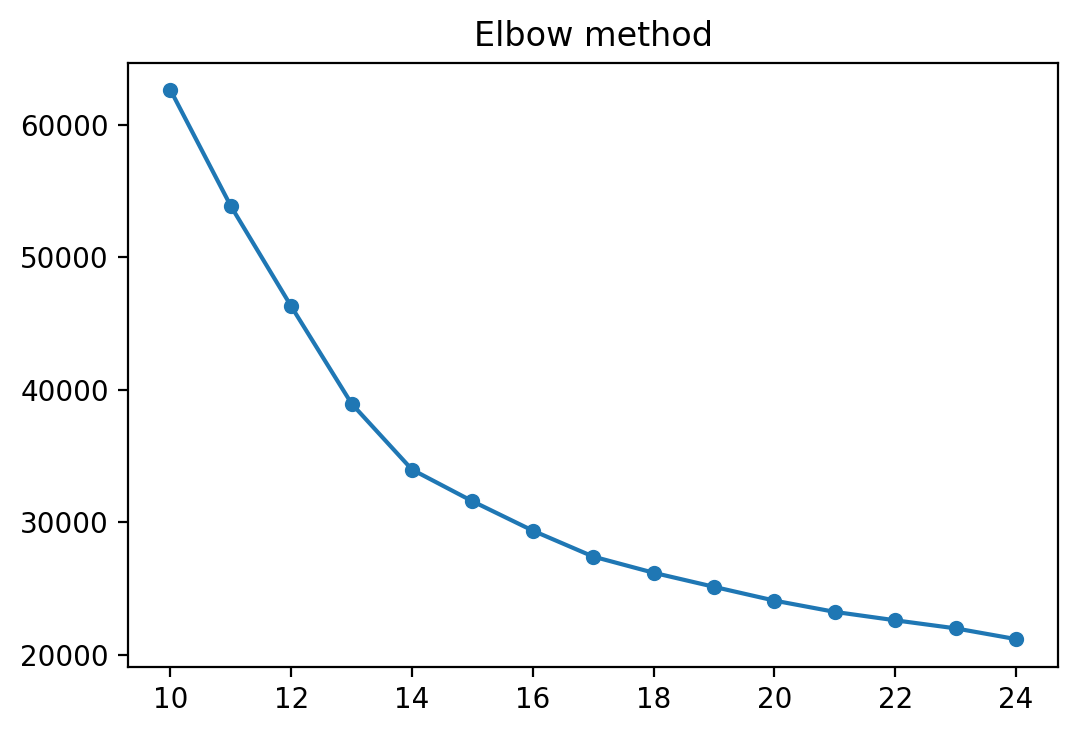

In [96]:
plt.figure(dpi=200)
sns.lineplot(x = range(10, 25, 1), y = inertia)
sns.scatterplot(x = range(10, 25, 1), y = inertia)
plt.title("Elbow method");

## Two layer K-means

In [88]:
kmeans = KMeans(n_clusters=14)

kmeans.fit(XTrain)

first_layer = pd.DataFrame(kmeans.fit_predict(XTrain), columns = ['km'])

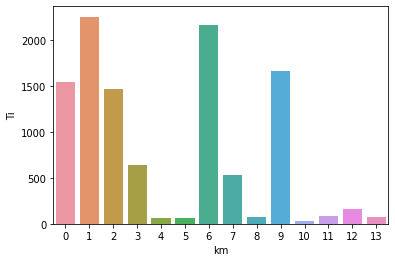

In [92]:
sns.barplot(data = pd.concat([first_layer, XTrain], axis = 1).groupby('km', as_index = False).count()[['km', 'Ti']],
            x = 'km',
            y = 'Ti'
)

cluster4 = pd.concat([first_layer, XTrain], axis = 1)
cluster4 = cluster4[cluster4['km'] == 6]

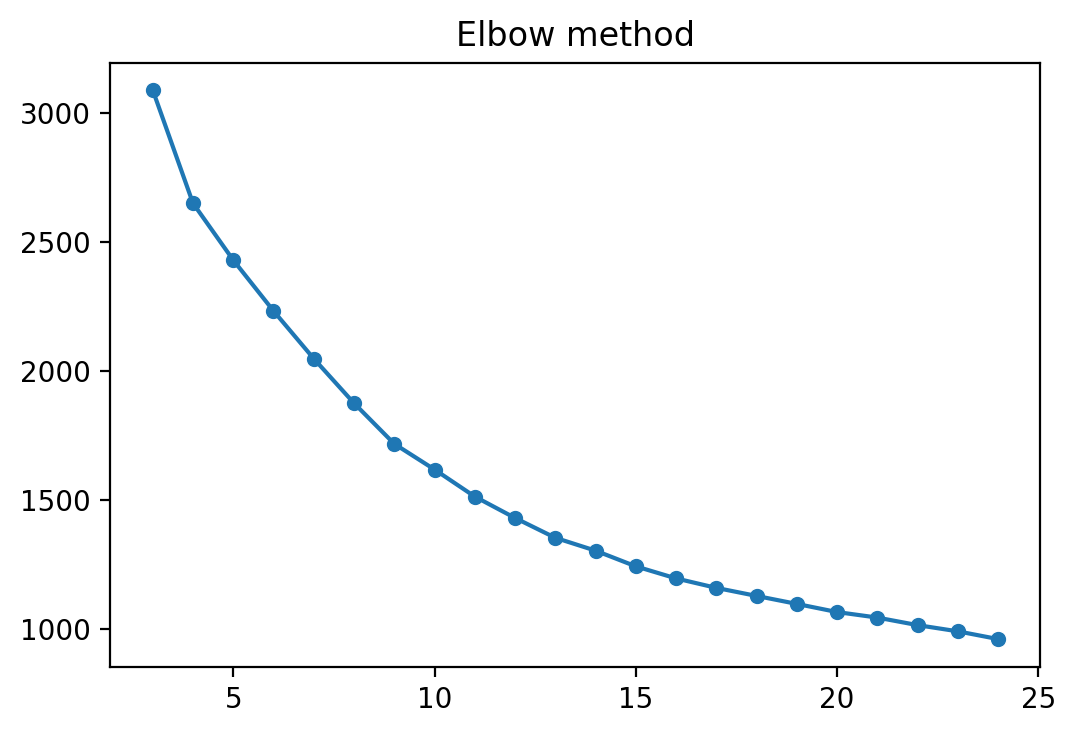

In [93]:
inertia = []
for i in range(3, 25, 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(cluster4.loc[:, 'Spectrum Counts':])
    inertia.append(kmeans.inertia_)

plt.figure(dpi=200)
sns.lineplot(x = range(3, 25, 1), y = inertia)
sns.scatterplot(x = range(3, 25, 1), y = inertia)
plt.title("Elbow method");

# Agglomerative Clustering

In [38]:
hc = AgglomerativeClustering(n_clusters=23, affinity = 'euclidean', linkage = 'ward', compute_full_tree = True)
y_hc = hc.fit_predict(XTrain.loc[:,:])

yTrain['hc'] = y_hc

In [42]:
pca_train = pd.DataFrame(data = PCA(4).fit_transform(XTrain.loc[:, 'Spectrum Counts':'Zn']),
                columns = ['PC1', 'PC2','PC3', 'PC4'])

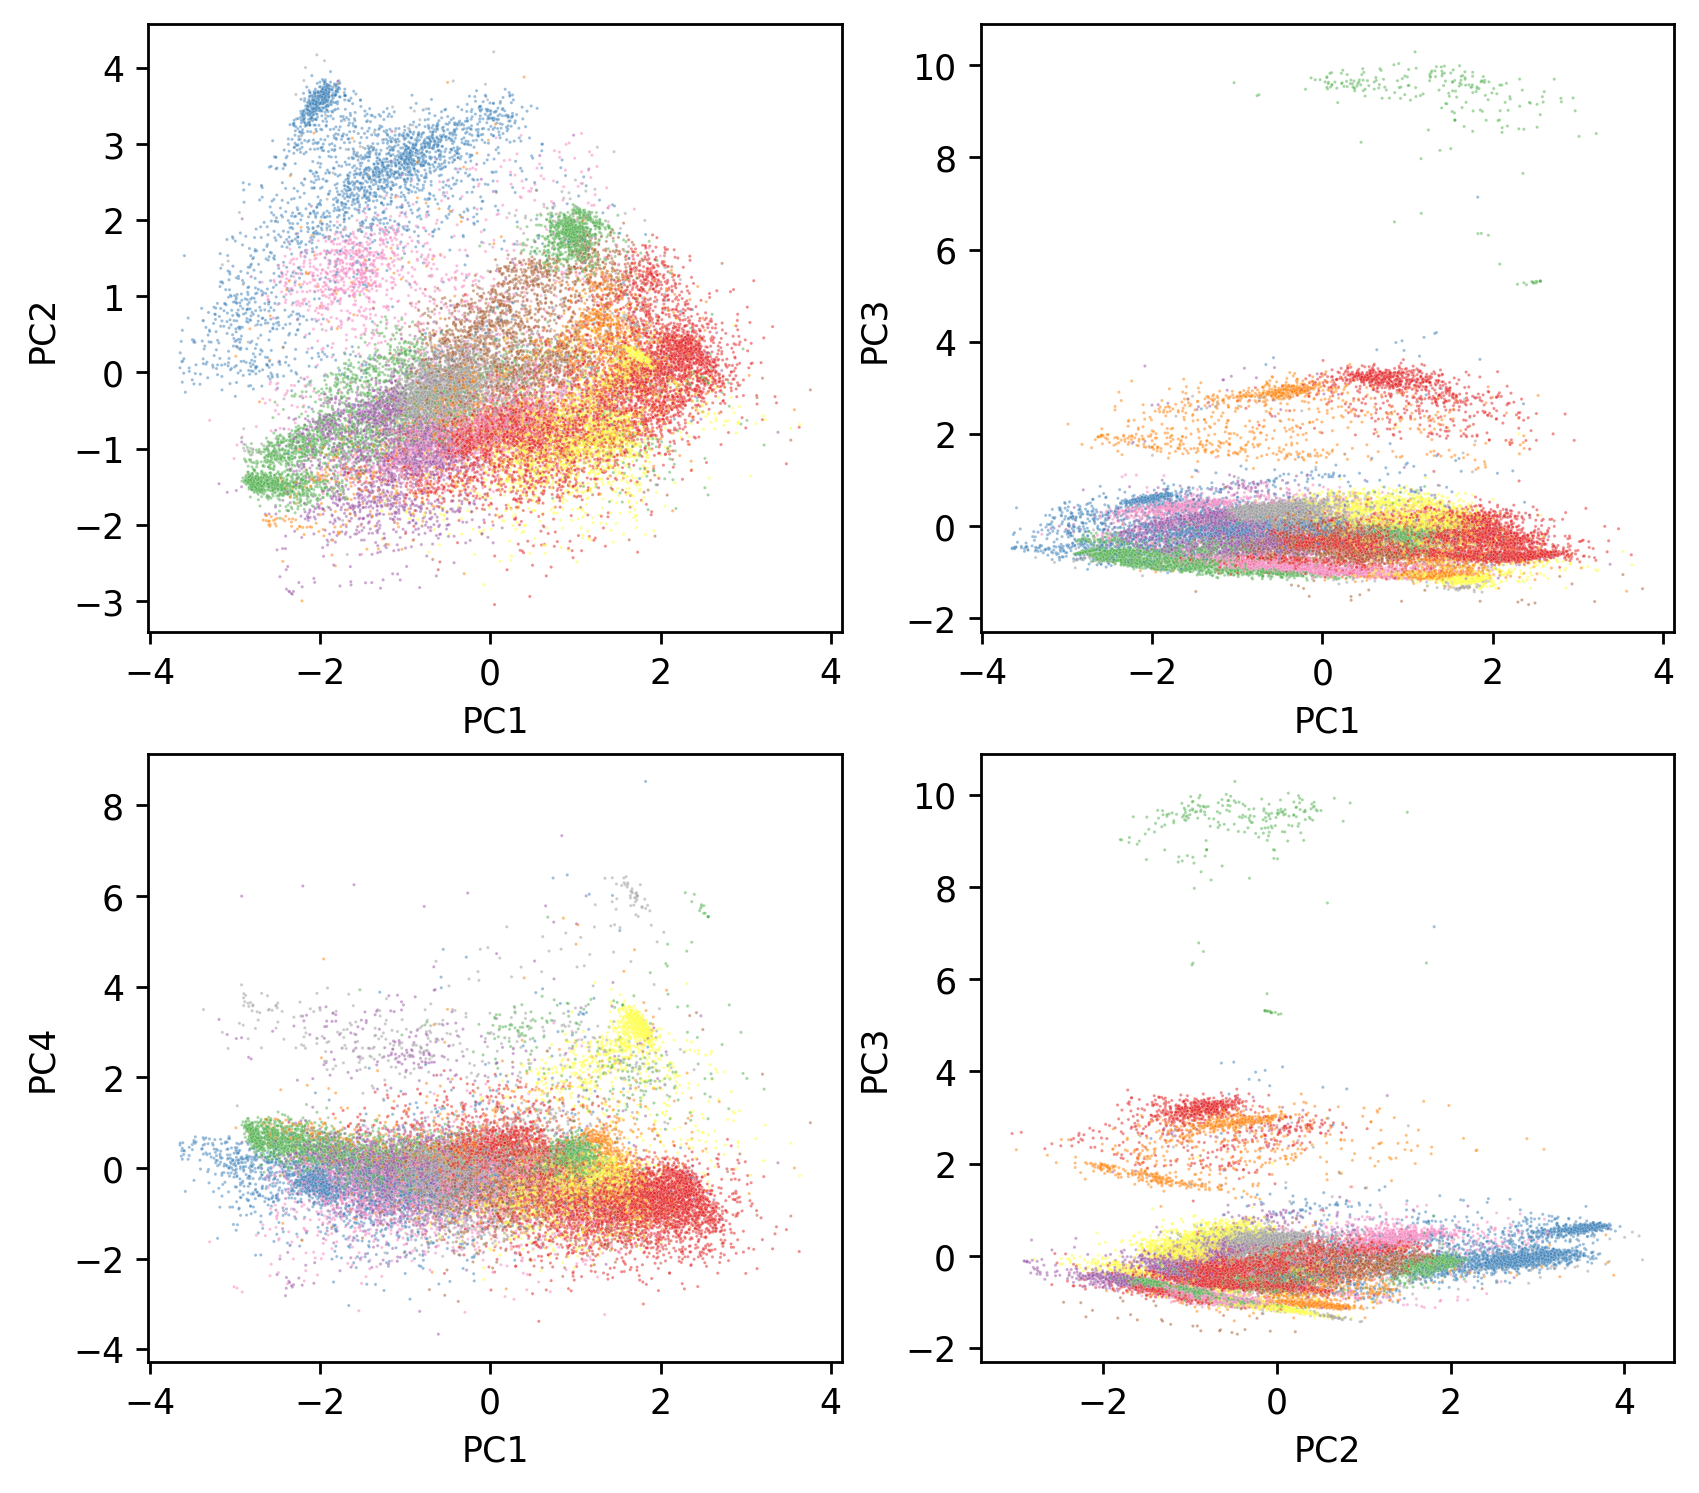

In [45]:
# PC vs PC

plt.figure(figsize = (20*cm, 18*cm), dpi = 250)

# Config
alpha = 0.5
size = 0.8
minerals = yTrain['hc']
palet = 'Set1'
legenda = False

plt.subplot(2,2,1)

sns.scatterplot(
    data = pca_train,
    x = 'PC1',
    y = 'PC2',
    s = size,
    alpha = alpha,
    # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda
)

plt.subplot(2,2,2)

sns.scatterplot(
    data = pca_train,
    x = 'PC1',
    y = 'PC3',
    s = size,
    alpha = alpha,
      # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda 
)

plt.subplot(2,2,3)

sns.scatterplot(
    data = pca_train,
    x = 'PC1',
    y = 'PC4',
    s = size,
    alpha = alpha,
        # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda  
)

plt.subplot(2,2,4)

sns.scatterplot(
    data = pca_train,
    x = 'PC2',
    y = 'PC3',
    s = size,
    alpha = alpha,
        # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda  
)

plt.show()

In [73]:
db_melt = XTrain.melt(id_vars= ['hc'])
db_melt.head()

,hc,variable,value
0,14,Spectrum Counts,-1.397145
1,14,Spectrum Counts,-1.529059
2,18,Spectrum Counts,0.608323
3,9,Spectrum Counts,1.621064
4,7,Spectrum Counts,-1.860241


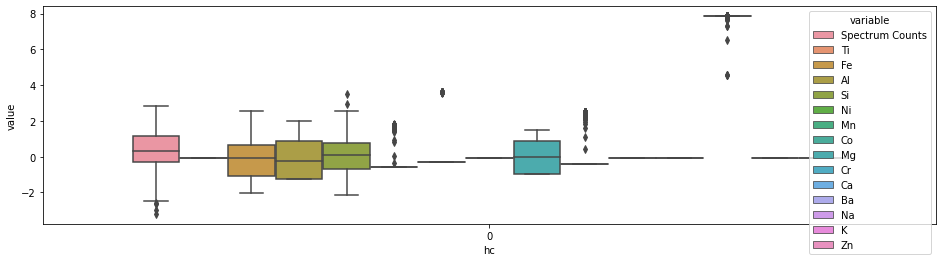

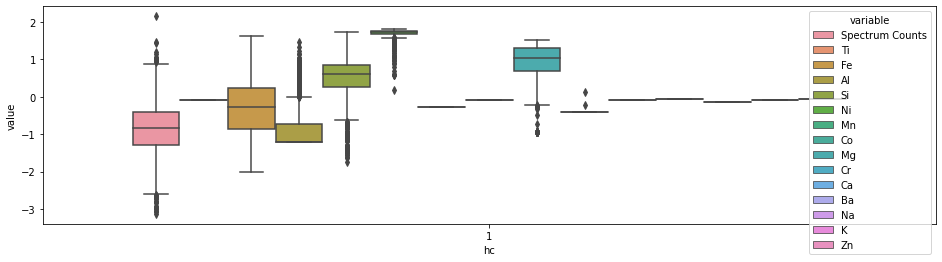

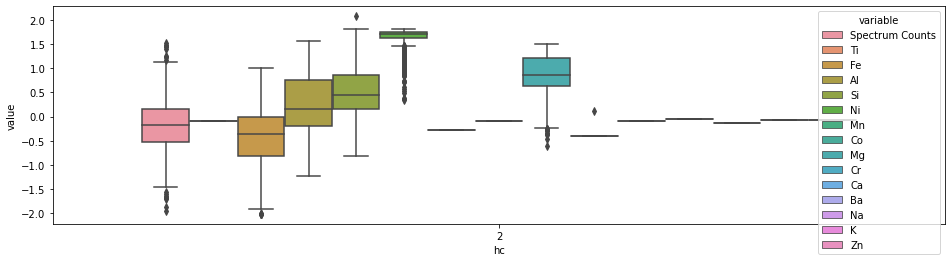

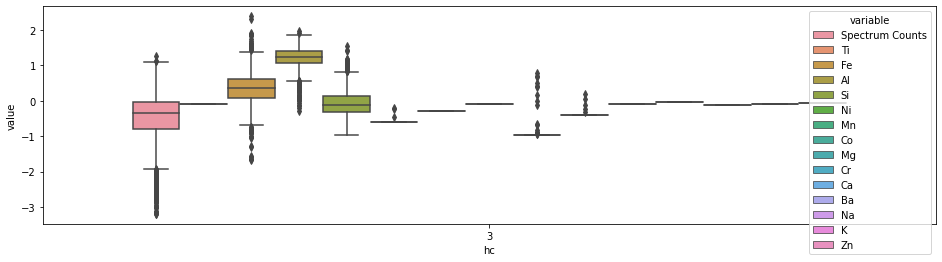

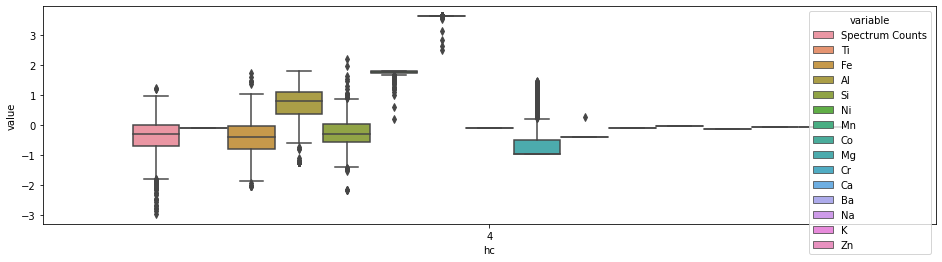

In [74]:
for i in range(5):
    filter = (db_melt['hc'] == i)
    plt.figure(figsize=(16,4))
    sns.boxplot(data = db_melt[filter], x = 'hc', y = 'value', hue = 'variable');

# Silhouette

## K-Means

In [ ]:
sil_score_max = -1 #this is the minimum possible score

silhouette = pd.DataFrame(columns = ['n_clusters', 'sil_score'])

range = range(20,40,1)

for n_clusters in range:
  model = KMeans(n_clusters = n_clusters, init='k-means++', n_init=1)
  labels = model.fit_predict(XTrain)
  sil_score = silhouette_score(XTrain, labels)
  # print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))

  silhouette = pd.concat([silhouette, pd.DataFrame(data=[[n_clusters, sil_score]], columns=['n_clusters', 'sil_score'])])
  if sil_score > sil_score_max:
    sil_score_max = sil_score
    best_n_clusters = n_clusters

silhouette.reset_index(inplace=True, drop=True)


27


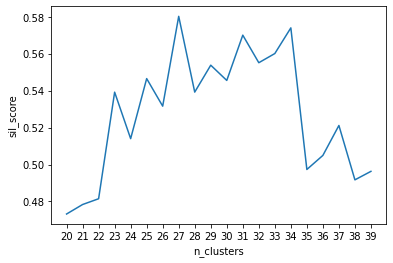

In [94]:
sns.lineplot(data=silhouette, x = 'n_clusters', y = 'sil_score')
text = n_clusters #silhouette[silhouette.sil_score == silhouette.sil_score.max()]['n_clusters']
plt.annotate(text = f'{text}', xy = (n_clusters, best_n_clusters), xytext = (30,0.4))
plt.xticks(range);

print(best_n_clusters)

## Agglomerative Clustering

In [35]:
sil_score_max = -1 #this is the minimum possible score

silhouette = pd.DataFrame(columns = ['n_clusters', 'sil_score'])

range = np.arange(20,40,1)

for n_clusters in range:
  model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward', compute_full_tree = True)
  labels = model.fit_predict(XTrain)
  sil_score = silhouette_score(XTrain, labels)
  # print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))

  silhouette = pd.concat([silhouette, pd.DataFrame(data=[[n_clusters, sil_score]], columns=['n_clusters', 'sil_score'])], axis = 0)
  if sil_score > sil_score_max:
    sil_score_max = sil_score
    best_n_clusters = n_clusters

silhouette.reset_index(inplace=True, drop=True)

23


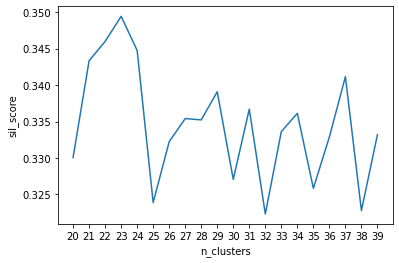

In [37]:
sns.lineplot(data=silhouette, x = 'n_clusters', y = 'sil_score')
text = n_clusters #silhouette[silhouette.sil_score == silhouette.sil_score.max()]['n_clusters']
plt.annotate(text = f'{text}', xy = (n_clusters, best_n_clusters), xytext = (30,0.4))
plt.xticks(range);

print(best_n_clusters)

# DBSCAN 
Muito demorado

In [46]:
DS = DBSCAN(eps=3, min_samples = 5)
yTrain['DBSCAN'] = DS.fit_predict(XTrain)
yTrain.DBSCAN.nunique()

15

In [18]:
silhouette_db = pd.DataFrame(columns= ('eps', 'sil_score'))

for i in np.arange(0.2, 1.2, 0.2):
    model = DBSCAN(eps= i, min_samples = 5).fit_predict(XTrain)
    nunique = pd.Series(model).nunique()
    silhouette_db.loc[i, 'eps'] = i
    silhouette_db.loc[i, 'nunique'] = nunique
    silhouette_db.loc[i, 'sil_score'] = silhouette_score(XTrain, model, random_state = 0)

display(silhouette_db)

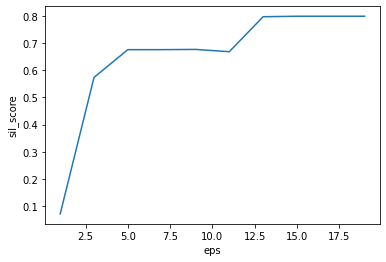

In [ ]:
sns.lineplot(data = silhouette_db, x = 'eps', y = 'sil_score')
plt.xticks(np.arange(20, 40, 2));

,min_samp,sil_score,nunique
3,3,0.367085,19.0
4,4,0.366861,17.0
5,5,0.57328,15.0
6,6,0.574896,13.0
7,7,0.574896,13.0
8,8,0.574896,13.0
9,9,0.574896,13.0
10,10,0.576322,11.0


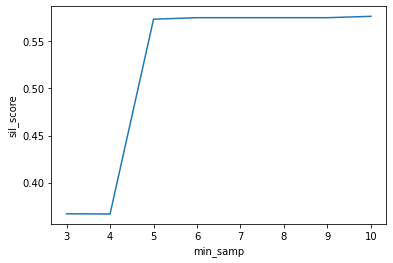

In [47]:
silhouette_db = pd.DataFrame(columns= ('min_samp', 'sil_score'))

for i in range(3,11,1):
    model = DBSCAN(eps= 3, min_samples = i).fit_predict(XTrain)
    nunique = pd.Series(model).nunique()
    silhouette_db.loc[i, 'min_samp'] = i
    silhouette_db.loc[i, 'nunique'] = nunique
    silhouette_db.loc[i, 'sil_score'] = silhouette_score(XTrain, model, random_state = 0)

display(silhouette_db)

sns.lineplot(data = silhouette_db, x = 'min_samp', y = 'sil_score');

## GridSearchCV

In [168]:
silhouette_db = pd.DataFrame(columns= ('min_samp', 'sil_score'))
x = 1
for eps in np.arange(3, 10, 1):
    for min_samp in np.arange(7,8,1):
        
        model = DBSCAN(eps= eps, min_samples = 7).fit_predict(XTrain)
        nunique = pd.Series(model).nunique()
        silhouette_db.loc[x, 'nunique'] = nunique
        silhouette_db.loc[x, 'min_samp'] = min_samp
        silhouette_db.loc[x, 'eps'] = eps
        silhouette_db.loc[x, 'sil_score'] = silhouette_score(XTrain, model, random_state = 0)

        x += 1

display(silhouette_db.sort_values(by = 'sil_score', ascending = False))

,min_samp,sil_score,nunique,eps
7,7,0.682266,8.0,9.0
6,7,0.680071,8.0,8.0
5,7,0.679151,8.0,7.0
3,7,0.678694,8.0,5.0
4,7,0.678694,8.0,6.0
2,7,0.585383,9.0,4.0
1,7,0.578493,11.0,3.0


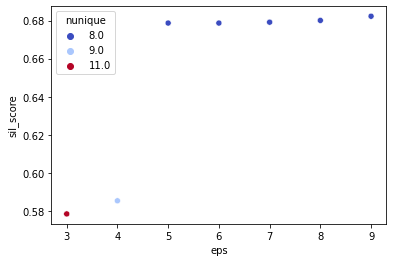

In [169]:
sns.scatterplot(data = silhouette_db, x = 'eps', y = 'sil_score', hue = 'nunique', palette= 'coolwarm');


# Optics

In [100]:
from sklearn.cluster import OPTICS

In [148]:
max_eps = np.arange(0.1, 1, 0.1)
min_samples = np.arange(2, 5, 1)

optics_metrics = pd.DataFrame(columns= ['unique', 'silhou', 'max_eps', 'min_samples'])

for e in max_eps:
    for s in min_samples:

        optic = OPTICS(min_samples = s, max_eps = e, metric = 'minkowski', cluster_method = 'dbscan')
        # metrics: [euclidean, seuclidean, sqeuclidean, minkowski]
        # cluster_method: [xi, dbscan]
        pred = pd.Series(optic.fit_predict(XTrain))
        optics_metrics = pd.concat([
            optics_metrics, 
            pd.DataFrame([[pred.nunique(), silhouette_score(XTrain, pred, random_state = 0), e, s]], columns= ['unique', 'silhou', 'max_eps', 'min_samples'])], 
            axis = 0) 

optics_metrics.reset_index(inplace =True, drop= True)       

,unique,silhou,max_eps,min_samples
25,50,-0.044599,0.9,3
26,39,-0.057009,0.9,4
20,38,-0.066943,0.7,4
23,40,-0.080391,0.8,4
14,66,-0.118085,0.5,4
22,62,-0.11832,0.8,3
17,50,-0.139786,0.6,4
19,59,-0.141911,0.7,3
21,103,-0.15757,0.8,2
24,101,-0.179419,0.9,2


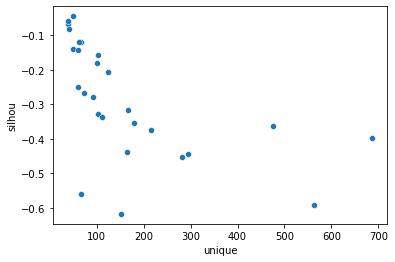

In [149]:
# yTrain['Op'] =  optic.fit_predict(XTrain)
# silhouette_score(XTrain, yTrain['Op'], random_state = 0)

display(optics_metrics.sort_values(by = 'silhou', ascending = False).head(10))

sns.scatterplot(data = optics_metrics,
                x = 'unique',
                y = 'silhou');


# GaussianMixture

In [87]:
from sklearn.mixture import GaussianMixture

In [158]:
n_components = np.arange(10,40,1)
cov_type = ['tied']
# 'spherical', 'full', 'diag', 'tied'


GM_metrics = pd.DataFrame()

for i in n_components:
    for c in cov_type:
        gm_model = GaussianMixture(n_components = i, covariance_type = c)
        pred = pd.Series( gm_model.fit_predict(XTrain))
        GM_metrics = pd.concat([
            GM_metrics, 
            pd.DataFrame([[i, 
            silhouette_score(XTrain, pred, random_state = 0),
            c]])], 
            axis = 0)

GM_metrics.reset_index(inplace = True, drop = True)

,0,1,2
6,16,0.343135,tied
9,19,0.341998,tied
8,18,0.337509,tied
7,17,0.334580,tied
5,15,0.332622,tied
4,14,0.331555,tied
14,24,0.323678,tied
10,20,0.323451,tied
3,13,0.321214,tied
21,31,0.321149,tied


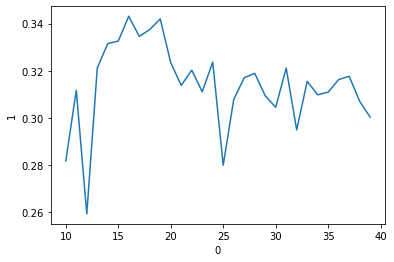

In [159]:
# yTrain.loc[:,'GM'] =  gm_model.fit_predict(XTrain)
# silhouette_score(XTrain, yTrain['GM'], random_state = 0)

display(GM_metrics.sort_values(by = 1, ascending= False).head(20))

sns.lineplot(data = GM_metrics,
                x = 0,
                y = 1,
                # hue = 2
                );

# Normality test

In [ ]:
!pip install statsmodels
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

## example o QQ plot

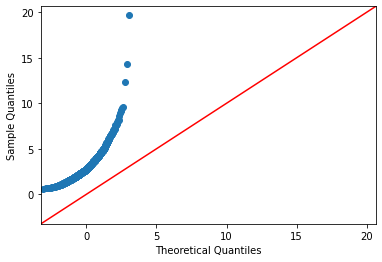

In [7]:
#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = np.

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(lognorm_dataset, line='45')

plt.show()

## generating random normal/log-normal dist

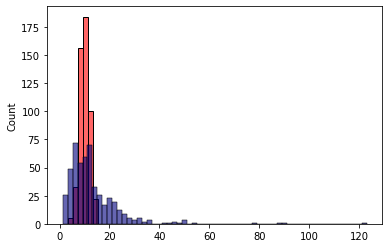

In [57]:
np.random.seed(5)
normal = np.random.normal(10, 2, 500)
log_norm = np.random.lognormal(np.log(10), np.log(2), 500)

for i,c in zip([normal, log_norm], ['r', 'navy']):
    sns.histplot(data = i, binwidth=2 , color = c, alpha = 0.6)

plt.show()

<Figure size 432x288 with 0 Axes>

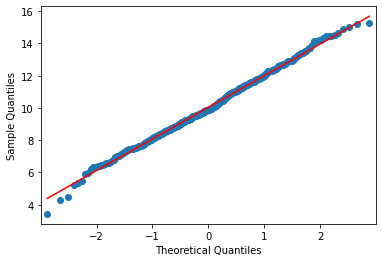

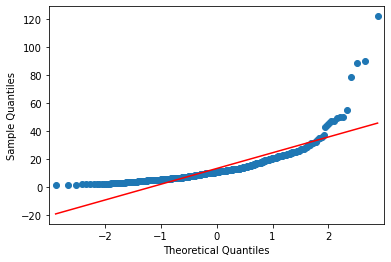

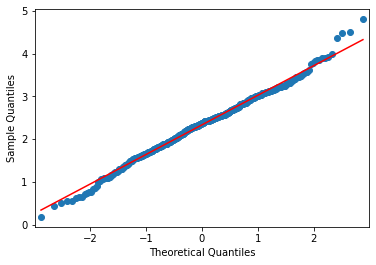

In [71]:
fig = plt.figure()
for i,c in zip([normal, log_norm, np.log(log_norm)], [1,2,3]):
    # plt.subplot(1,3,c)
    sm.qqplot(i, line = 's')

plt.show()

In [72]:
from scipy.stats import shapiro, kstest

print(
    'Normal:',
    shapiro(normal),
    kstest(rvs = normal, cdf = 'norm', args=(np.mean(normal), np.std(normal))),
    'Log_Normal:',
    shapiro(log_norm),
    kstest(rvs = log_norm, cdf = 'norm', args=(np.mean(log_norm), np.std(log_norm))),
    'np.log(Log_Normal):',
    shapiro(np.log(log_norm)),
    kstest(rvs = np.log(log_norm), cdf = 'norm', args=(np.mean(np.log(log_norm)), np.std(np.log(log_norm)))),
    sep = '\n'
)


Normal:
ShapiroResult(statistic=0.9969273209571838, pvalue=0.468311607837677)
KstestResult(statistic=0.0381878152515277, pvalue=0.44837586741456625)
Log_Normal:
ShapiroResult(statistic=0.6816701889038086, pvalue=1.378355862056687e-29)
KstestResult(statistic=0.16140896105754687, pvalue=7.550653856673007e-12)
np.log(Log_Normal):
ShapiroResult(statistic=0.994245707988739, pvalue=0.05618251487612724)
KstestResult(statistic=0.04046932727402425, pvalue=0.3759750347686497)


Ti ShapiroResult(statistic=0.9369456768035889, pvalue=0.0007228959002532065)


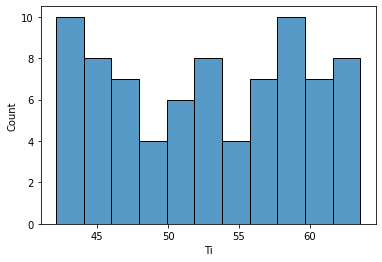

Fe ShapiroResult(statistic=0.7932239770889282, pvalue=3.6095797462110113e-09)


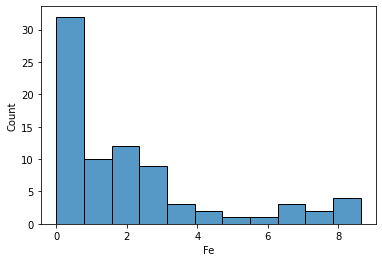

Al ShapiroResult(statistic=0.6472306251525879, pvalue=1.7583745874280576e-12)


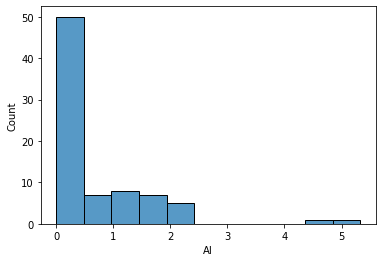

Si ShapiroResult(statistic=0.6083360910415649, pvalue=3.37615948652753e-13)


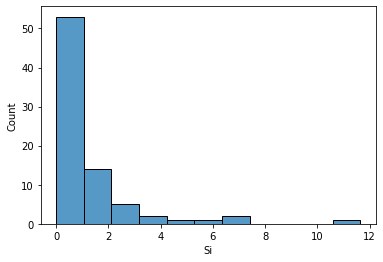

c:\Users\cetem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Ni ShapiroResult(statistic=1.0, pvalue=1.0)


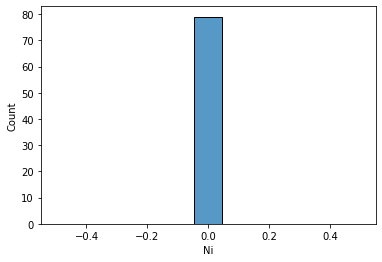

c:\Users\cetem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Mn ShapiroResult(statistic=1.0, pvalue=1.0)


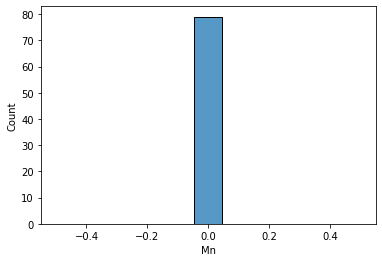

c:\Users\cetem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Co ShapiroResult(statistic=1.0, pvalue=1.0)


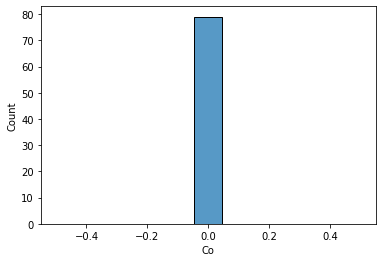

Mg ShapiroResult(statistic=0.14587217569351196, pvalue=3.014458892657024e-19)


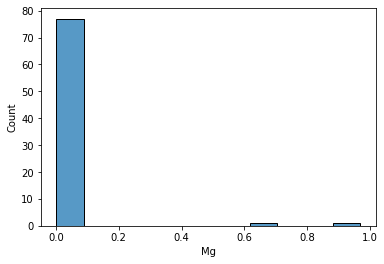

Cr ShapiroResult(statistic=1.0, pvalue=1.0)


c:\Users\cetem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


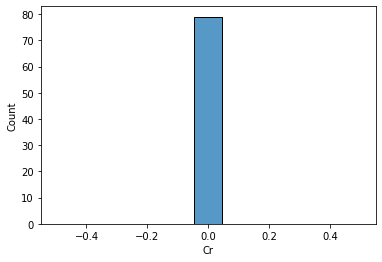

c:\Users\cetem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Ca ShapiroResult(statistic=1.0, pvalue=1.0)


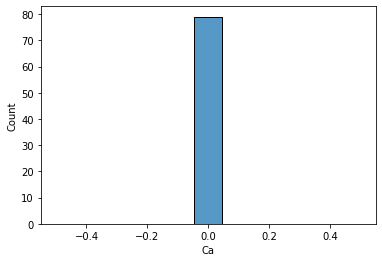

Ba ShapiroResult(statistic=1.0, pvalue=1.0)


c:\Users\cetem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


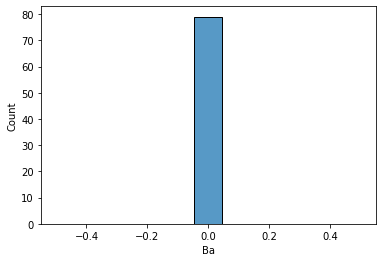

Na ShapiroResult(statistic=0.1468631625175476, pvalue=3.0842326113016374e-19)


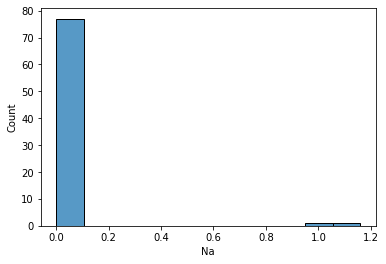

K ShapiroResult(statistic=0.08974051475524902, pvalue=8.51624962876706e-20)


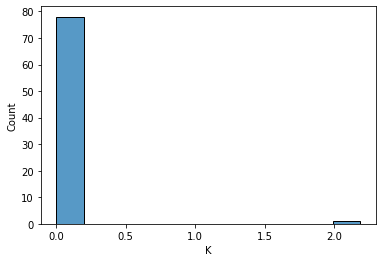

Zn ShapiroResult(statistic=0.08974051475524902, pvalue=8.51624962876706e-20)


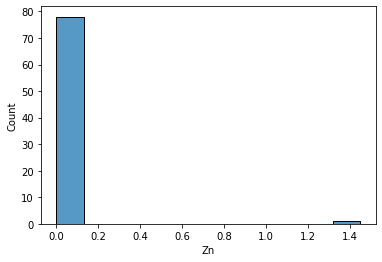

In [96]:
for i in db_chem.loc[:, 'Ti':].columns:
    data = db_chem[db_chem['Mineral Classification'] == 'Anatase'].loc[:, i]
    print(i, shapiro(data))
    sns.histplot(data, bins = 11)
    plt.show()